In [1]:
from IPython.display import IFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, CategoricalColorMapper, Legend, BoxSelectTool, FactorRange
from bokeh.layouts import gridplot, column
from bokeh.palettes import Spectral6, Pastel1, Category20c, Inferno256

output_notebook()

Loading BokehJS ...

# Introducing Pandas

What can pandas do for you? Some examples:
- managing missing data
- easily access/add/remove rows/columns
- managing multi level / hierarchical indeces
- automatic data alignment
- groupby, split, filters, slicing, indexing, subsetting
- merging and joining
- reshaping and pivoting
- read / write data from a number of sources
- time series functionality (moving window statistics, moving window linear regressions, date shifting etc.)

## Series

A series can be thought as an array +  an index or as an ordered key-value collection.

If not specified, you'll get a default int incremental index

In [60]:
a_series = pd.Series([62, 168, 59, 51])
a_series

0     62
1    168
2     59
3     51
dtype: int64

In [61]:
pd.Series(range(100)).head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

Series can be sliced like python lists

In [62]:
a_series[::-1]

3     51
2     59
1    168
0     62
dtype: int64

In [63]:
print(a_series.values)
print(type(a_series.values))

[ 62 168  59  51]
<class 'numpy.ndarray'>


In [64]:
a_series.index

RangeIndex(start=0, stop=4, step=1)

In [65]:
a_series.index.values

array([0, 1, 2, 3])

In [66]:
type(a_series.index.values[0])

numpy.int64

Index can be declared explicitly; in that case it has to match the size of data

In [67]:
production_2017 = pd.Series([13,18,1,45], index=["Q1", "Q2", "Q3", "Q4"])
production_2017

Q1    13
Q2    18
Q3     1
Q4    45
dtype: int64

In [68]:
pd.Series([13,18,1,45], index=["Q1", "Q2", "Q3", "Q4"])

Q1    13
Q2    18
Q3     1
Q4    45
dtype: int64

Series can be accessed by index and always by numerical index whether or not an explicit index exists.
Careful though, this is depracated. To be consistend with DataFrame always use iloc (more on this later).

```
treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by 
position, use `ser.iloc[pos]`
```

In [69]:
production_2017[0] == production_2017['Q1']

/var/folders/pc/gjpfpzxj0tvgpt2ckbd620fr0000gq/T/ipykernel_3352/3564179041.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  production_2017[0] == production_2017['Q1']


True

Both the index and the values array can be named

In [70]:
production_2017.index.name = "Quarter"
production_2017.name = "2017 production"
production_2017

Quarter
Q1    13
Q2    18
Q3     1
Q4    45
Name: 2017 production, dtype: int64

Math functions and filtering can be applied to series without losing the series structure

In [71]:
production_2017_square = np.square(production_2017)
production_2017_square.name = "Square of 2017 production"
production_2017_square

Quarter
Q1     169
Q2     324
Q3       1
Q4    2025
Name: Square of 2017 production, dtype: int64

In [72]:
production_2017[production_2017 < 10]

Quarter
Q3    1
Name: 2017 production, dtype: int64

## Using index with multiple series

In [73]:
emp_2017_from_foo = pd.Series([10,12,5,11,14], index=["IT", "Sales", "Marketing", "HR", "Operations"])
print(emp_2017_from_foo)
emp_2017_from_bar = pd.Series(emp_2017_from_foo, index=["Sales", "HR", "IT","Manifacturing"])
emp_2017_from_bar

IT            10
Sales         12
Marketing      5
HR            11
Operations    14
dtype: int64


Sales            12.0
HR               11.0
IT               10.0
Manifacturing     NaN
dtype: float64

In [74]:
combined_emp = emp_2017_from_bar + emp_2017_from_foo
combined_emp

HR               22.0
IT               20.0
Manifacturing     NaN
Marketing         NaN
Operations        NaN
Sales            24.0
dtype: float64

# Dataframe

View, store, manipulate multivariate data (of potentially different types). It's like a table where every column is a pandas series and you can access the same index on different columns.

Dataframes can be initialized by columns (series), by row, or by importing data.

In [75]:
ks_project = pd.DataFrame({
    "name": ["My Moon - Animated Short Film", "Daily Brew Coffee", "Ledr workbook: one tough journal!", "Feather Cast Furled Fly Fishing Leaders", "BB130A"],
    "goal": [50000,3500,1000,2000,25000],
    "pledged": [57577.31, 21, 47266, 2000, 1395],
    "state": ["successful" ,"failed" ,"successful" ,"successful" ,"failed"],
    "id": ["B001E4KFG0","B00813GRG4","B000LQOCH0","B000UA0QIQ","B006K2ZZ7K"]})
ks_project

,name,goal,pledged,state,id
0,My Moon - Animated Short Film,50000,57577.31,successful,B001E4KFG0
1,Daily Brew Coffee,3500,21.00,failed,B00813GRG4
2,Ledr workbook: one tough journal!,1000,47266.00,successful,B000LQOCH0
3,Feather Cast Furled Fly Fishing Leaders,2000,2000.00,successful,B000UA0QIQ
4,BB130A,25000,1395.00,failed,B006K2ZZ7K


In [76]:
ks_project = pd.DataFrame([
    {"goal" :50000, "name": "My Moon - Animated Short Film", "pledged": 57577.31, "state":"successful", "id": "B001E4KFG0"},
    {"goal" :3500, "name": "Daily Brew Coffee", "pledged": 21.00, "state":"failed", "id": "B00813GRG4"},
    {"goal" :1000, "name": "Ledr workbook: one tough journal!", "pledged": 47266.00, "state":"successful", "id": "B000LQOCH0"},
    {"goal" :2000, "name": "Feather Cast Furled Fly Fishing Leaders", "pledged": 2000.00, "state":"successful", "id": "B000UA0QIQ"},
    {"goal" :25000, "name": "BB130A", "pledged": 1395.00, "state":"failed", "id": "B006K2ZZ7K"} 
    ])
ks_project

,goal,name,pledged,state,id
0,50000,My Moon - Animated Short Film,57577.31,successful,B001E4KFG0
1,3500,Daily Brew Coffee,21.00,failed,B00813GRG4
2,1000,Ledr workbook: one tough journal!,47266.00,successful,B000LQOCH0
3,2000,Feather Cast Furled Fly Fishing Leaders,2000.00,successful,B000UA0QIQ
4,25000,BB130A,1395.00,failed,B006K2ZZ7K


In [77]:
ks_project.columns

Index(['goal', 'name', 'pledged', 'state', 'id'], dtype='object')

In [78]:
print(ks_project.dtypes)
print(ks_project.dtypes.values)
print(type(ks_project.dtypes))

goal         int64
name        object
pledged    float64
state       object
id          object
dtype: object
[dtype('int64') dtype('O') dtype('float64') dtype('O') dtype('O')]
<class 'pandas.core.series.Series'>


In [79]:
ks_project['goal']
ks_project.goal

0    50000
1     3500
2     1000
3     2000
4    25000
Name: goal, dtype: int64

## Accessing rows and indeces

Access by row with `df.loc[index]`.
Index can be set, but be aware that it will return a new df with the new index, unless you specify inplace=True. 

.loc is normally label based, but can also take an array of boolean (returned from a selection on the DF).

.loc can take:
- a single label
- a list of labels
- a slice: slices, as opposed to slices on lists, are inclusive at start *and* end => [start,end]
- a boolean array


In [80]:
ks_project.loc[2]

goal                                    1000
name       Ledr workbook: one tough journal!
pledged                              47266.0
state                             successful
id                                B000LQOCH0
Name: 2, dtype: object

In [81]:
ks_project.set_index("id")

,goal,name,pledged,state
id,,,,
B001E4KFG0,50000,My Moon - Animated Short Film,57577.31,successful
B00813GRG4,3500,Daily Brew Coffee,21.00,failed
B000LQOCH0,1000,Ledr workbook: one tough journal!,47266.00,successful
B000UA0QIQ,2000,Feather Cast Furled Fly Fishing Leaders,2000.00,successful
B006K2ZZ7K,25000,BB130A,1395.00,failed


In [82]:
ks_project

,goal,name,pledged,state,id
0,50000,My Moon - Animated Short Film,57577.31,successful,B001E4KFG0
1,3500,Daily Brew Coffee,21.00,failed,B00813GRG4
2,1000,Ledr workbook: one tough journal!,47266.00,successful,B000LQOCH0
3,2000,Feather Cast Furled Fly Fishing Leaders,2000.00,successful,B000UA0QIQ
4,25000,BB130A,1395.00,failed,B006K2ZZ7K


In [83]:
ks_project.set_index("id", inplace=True)
ks_project

,goal,name,pledged,state
id,,,,
B001E4KFG0,50000,My Moon - Animated Short Film,57577.31,successful
B00813GRG4,3500,Daily Brew Coffee,21.00,failed
B000LQOCH0,1000,Ledr workbook: one tough journal!,47266.00,successful
B000UA0QIQ,2000,Feather Cast Furled Fly Fishing Leaders,2000.00,successful
B006K2ZZ7K,25000,BB130A,1395.00,failed


In [84]:
ks_project.loc["B001E4KFG0":"B000LQOCH0"]

,goal,name,pledged,state
id,,,,
B001E4KFG0,50000,My Moon - Animated Short Film,57577.31,successful
B00813GRG4,3500,Daily Brew Coffee,21.00,failed
B000LQOCH0,1000,Ledr workbook: one tough journal!,47266.00,successful


In [85]:
ks2 = ks_project.reset_index()
ks2[pd.Series([True, False,False,False,False])]

,id,goal,name,pledged,state
0,B001E4KFG0,50000,My Moon - Animated Short Film,57577.31,successful


## Accessing and adding columns

When you access a column, the series that you get back can be a view or a copy from the dataframe. This depends on the memory layout of the underlying array and pandas does not make any guarantees on it. 

This is one reason why, if you try to do assignment with chained indexing, you'll get a warning. Another reason why you get the warning is that if you do assignment with chained indexing you might get a view (instead of a copy) and thus you'll change also the original dataframe.

Column access is with the [] notation.

In [86]:
ks_project.reset_index(inplace=True)
ks_project

,id,goal,name,pledged,state
0,B001E4KFG0,50000,My Moon - Animated Short Film,57577.31,successful
1,B00813GRG4,3500,Daily Brew Coffee,21.00,failed
2,B000LQOCH0,1000,Ledr workbook: one tough journal!,47266.00,successful
3,B000UA0QIQ,2000,Feather Cast Furled Fly Fishing Leaders,2000.00,successful
4,B006K2ZZ7K,25000,BB130A,1395.00,failed


In [87]:
goal = ks_project.goal
goal

0    50000
1     3500
2     1000
3     2000
4    25000
Name: goal, dtype: int64

In [88]:
goal[1] = 0

/var/folders/pc/gjpfpzxj0tvgpt2ckbd620fr0000gq/T/ipykernel_3352/2208029729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goal[1] = 0


In [89]:
goal

0    50000
1        0
2     1000
3     2000
4    25000
Name: goal, dtype: int64

In [90]:
ks_project['state'][1] = "test"
ks_project

/var/folders/pc/gjpfpzxj0tvgpt2ckbd620fr0000gq/T/ipykernel_3352/1521272199.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ks_project['state'][1] = "test"
/var/folders/pc/gjpfpzxj0tvgpt2ckbd620fr0000gq/T/ipykernel_3352/1521272199.py:1: S

,id,goal,name,pledged,state
0,B001E4KFG0,50000,My Moon - Animated Short Film,57577.31,successful
1,B00813GRG4,0,Daily Brew Coffee,21.00,test
2,B000LQOCH0,1000,Ledr workbook: one tough journal!,47266.00,successful
3,B000UA0QIQ,2000,Feather Cast Furled Fly Fishing Leaders,2000.00,successful
4,B006K2ZZ7K,25000,BB130A,1395.00,failed


In [91]:
ks_project.loc[1, 'state'] = 'no warning!'
ks_project

,id,goal,name,pledged,state
0,B001E4KFG0,50000,My Moon - Animated Short Film,57577.31,successful
1,B00813GRG4,0,Daily Brew Coffee,21.00,no warning!
2,B000LQOCH0,1000,Ledr workbook: one tough journal!,47266.00,successful
3,B000UA0QIQ,2000,Feather Cast Furled Fly Fishing Leaders,2000.00,successful
4,B006K2ZZ7K,25000,BB130A,1395.00,failed


In [92]:
ks_project.loc[1, 'state']

'no warning!'

In [93]:
import datetime as dt
ks_project["created_at"] = dt.datetime.now()
ks_project

,id,goal,name,pledged,state,created_at
0,B001E4KFG0,50000,My Moon - Animated Short Film,57577.31,successful,2025-03-03 11:58:31.288233
1,B00813GRG4,0,Daily Brew Coffee,21.00,no warning!,2025-03-03 11:58:31.288233
2,B000LQOCH0,1000,Ledr workbook: one tough journal!,47266.00,successful,2025-03-03 11:58:31.288233
3,B000UA0QIQ,2000,Feather Cast Furled Fly Fishing Leaders,2000.00,successful,2025-03-03 11:58:31.288233
4,B006K2ZZ7K,25000,BB130A,1395.00,failed,2025-03-03 11:58:31.288233


In [94]:
ks_project["right"] = [5,4,3,2,1]

In [95]:
ks_project

,id,goal,name,pledged,state,created_at,right
0,B001E4KFG0,50000,My Moon - Animated Short Film,57577.31,successful,2025-03-03 11:58:31.288233,5
1,B00813GRG4,0,Daily Brew Coffee,21.00,no warning!,2025-03-03 11:58:31.288233,4
2,B000LQOCH0,1000,Ledr workbook: one tough journal!,47266.00,successful,2025-03-03 11:58:31.288233,3
3,B000UA0QIQ,2000,Feather Cast Furled Fly Fishing Leaders,2000.00,successful,2025-03-03 11:58:31.288233,2
4,B006K2ZZ7K,25000,BB130A,1395.00,failed,2025-03-03 11:58:31.288233,1


In [97]:
ks_project["wrong"] = [3,2,1,4,5]

To access multiple columns, you can use the [] notation with a list.

However, with slices the behaviour is different. Slicing inside of [] slices the rows. This is provided largely as a convenience since it is such a common operation.

In [98]:
ks_project[['goal', 'pledged','state']]

,goal,pledged,state
0,50000,57577.31,successful
1,0,21.00,no warning!
2,1000,47266.00,successful
3,2000,2000.00,successful
4,25000,1395.00,failed


In [99]:
ks_project['goal':'pledged']

TypeError: cannot do slice indexing on RangeIndex with these indexers [goal] of type str

In [100]:
ks2 = ks_project.set_index('id')
ks2.loc["B00813GRG4":"B000LQOCH0"]

#ks2[[1,2]] # wrong
#ks2[1,2] # wrong
ks2[1:3]
#ks2.loc[1:3] # wrong


,goal,name,pledged,state,created_at,right,wrong
id,,,,,,,
B00813GRG4,0,Daily Brew Coffee,21.0,no warning!,2025-03-03 11:58:31.288233,4,2
B000LQOCH0,1000,Ledr workbook: one tough journal!,47266.0,successful,2025-03-03 11:58:31.288233,3,1


## Dropping rows/columns

In [101]:
ks_project.drop(["goal", "id"], axis=1)

,name,pledged,state,created_at,right,wrong
0,My Moon - Animated Short Film,57577.31,successful,2025-03-03 11:58:31.288233,5,3
1,Daily Brew Coffee,21.00,no warning!,2025-03-03 11:58:31.288233,4,2
2,Ledr workbook: one tough journal!,47266.00,successful,2025-03-03 11:58:31.288233,3,1
3,Feather Cast Furled Fly Fishing Leaders,2000.00,successful,2025-03-03 11:58:31.288233,2,4
4,BB130A,1395.00,failed,2025-03-03 11:58:31.288233,1,5


In [102]:
ks_project.drop([0,1,2])

,id,goal,name,pledged,state,created_at,right,wrong
3,B000UA0QIQ,2000,Feather Cast Furled Fly Fishing Leaders,2000.0,successful,2025-03-03 11:58:31.288233,2,4
4,B006K2ZZ7K,25000,BB130A,1395.0,failed,2025-03-03 11:58:31.288233,1,5


In [103]:
ks_project.set_index("id", inplace=True)
ks_project

,goal,name,pledged,state,created_at,right,wrong
id,,,,,,,
B001E4KFG0,50000,My Moon - Animated Short Film,57577.31,successful,2025-03-03 11:58:31.288233,5,3
B00813GRG4,0,Daily Brew Coffee,21.00,no warning!,2025-03-03 11:58:31.288233,4,2
B000LQOCH0,1000,Ledr workbook: one tough journal!,47266.00,successful,2025-03-03 11:58:31.288233,3,1
B000UA0QIQ,2000,Feather Cast Furled Fly Fishing Leaders,2000.00,successful,2025-03-03 11:58:31.288233,2,4
B006K2ZZ7K,25000,BB130A,1395.00,failed,2025-03-03 11:58:31.288233,1,5


In [104]:
ks_project.drop(["B000UA0QIQ", "B006K2ZZ7K"])

,goal,name,pledged,state,created_at,right,wrong
id,,,,,,,
B001E4KFG0,50000,My Moon - Animated Short Film,57577.31,successful,2025-03-03 11:58:31.288233,5,3
B00813GRG4,0,Daily Brew Coffee,21.00,no warning!,2025-03-03 11:58:31.288233,4,2
B000LQOCH0,1000,Ledr workbook: one tough journal!,47266.00,successful,2025-03-03 11:58:31.288233,3,1


## Importing data

No more manually parsing csv, just use read_csv or read_excel :)

Default parameters works pretty well, but you might want to customize them. You can specify for example:
- header
- separator (e.g. using regex)
- index_col
- skiprows
- nrows (to import the first n only)
- chunksize (will return an iterable object that can be used in a loop)
- na_values (what should be interpreted as NA)
- error_bad_lines / warn_bad_lines
- low_memory

In [105]:
ks2018 = pd.read_csv('ks-projects-201801.csv')
len(ks2018.values)

378661

In [106]:
ks_iter = pd.read_csv('ks-projects-201801.csv', chunksize=100000)
[np.mean(ks_chunk.backers.values) for ks_chunk in ks_iter]

[104.81818, 107.90923, 106.65135, 102.4058046554201]

In [107]:
ks_project = pd.read_csv('ks-projects-201801.csv')
np.unique(ks_project.state)

array(['canceled', 'failed', 'live', 'successful', 'suspended',
       'undefined'], dtype=object)

In [108]:
ks_project.loc[ks_project.state.isin(['undefined'])].head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00


## Dealing with nan

In [109]:
ks_project = pd.read_csv('ks-projects-201801.csv', na_values=['undefined'])
ks_project.loc[890]

ID                                                   1004402863
name                Nightingale Noel - An A Cappella Holiday CD
category                                                  Music
main_category                                             Music
currency                                                    USD
deadline                                             2015-12-11
goal                                                     1200.0
launched                                    2015-11-11 21:02:55
pledged                                                  1585.0
state                                                       NaN
backers                                                       0
country                                                    N,0"
usd pledged                                                 NaN
usd_pledged_real                                         1585.0
usd_goal_real                                            1200.0
Name: 890, dtype: object

In [110]:
ks_project.state.fillna("undefined", inplace=True)
ks_project.loc[890]

/var/folders/pc/gjpfpzxj0tvgpt2ckbd620fr0000gq/T/ipykernel_3352/3628792957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ks_project.state.fillna("undefined", inplace=True)


ID                                                   1004402863
name                Nightingale Noel - An A Cappella Holiday CD
category                                                  Music
main_category                                             Music
currency                                                    USD
deadline                                             2015-12-11
goal                                                     1200.0
launched                                    2015-11-11 21:02:55
pledged                                                  1585.0
state                                                 undefined
backers                                                       0
country                                                    N,0"
usd pledged                                                 NaN
usd_pledged_real                                         1585.0
usd_goal_real                                            1200.0
Name: 890, dtype: object

In [111]:
print(np.nan + 1)
print(np.nan == np.nan)

nan
False


In [112]:
x = pd.Series(range(5))
print(x)

x[3] = np.nan

print(x)

print(type(np.nan))

0    0
1    1
2    2
3    3
4    4
dtype: int64
0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
dtype: float64
<class 'float'>


In [113]:
print(pd.Series([True, False, False]))
print(pd.Series([True, np.nan, False]))

0     True
1    False
2    False
dtype: bool
0     True
1      NaN
2    False
dtype: object


In [114]:
ts = pd.Series([pd.Timestamp('20200101'), pd.Timestamp('20200102'), pd.Timestamp('20200103')])
print(ts)

ts[1] = np.nan

print(ts)

0   2020-01-01
1   2020-01-02
2   2020-01-03
dtype: datetime64[ns]
0   2020-01-01
1          NaT
2   2020-01-03
dtype: datetime64[ns]


### Type promotions of NA

| Typeclass   |      Promotion dtype for storing NAs      |
|:----------|:-------------|
| floating |  no change |
| object |    no change   |
| integer | cast to float64 |
| boolean | cast to object |

In [115]:
s_int = pd.Series(range(5), dtype=pd.Int64Dtype())
s_int

0    0
1    1
2    2
3    3
4    4
dtype: Int64

In [116]:
s_int[2] = np.nan
s_int

0       0
1       1
2    <NA>
3       3
4       4
dtype: Int64

### NA in calculations

In [117]:
print(x.sum())
print(x.sum(skipna=False))

7.0
nan



## Exercise

- Import the kickstarter dataset
- set a sensible index on the dataset, making sure that it's unique
- compute the average of backers for the entire dataset
- find the most frequent category and main_category

Use the ?help to find out about the `value_counts`, `duplicated`, `is_unique` and `mean` methods. Also use auto-completion on series objects to find out which methods are available to complete the exercise.

## Exercise: create a new unique index for the baseball dataset

You can use is_unique applied to an index or a series

In [118]:
b2 = pd.read_csv('baseball.csv')

## Creating and using a new index

For the rows that do not have a corresponding index, the default is to fill the rows with NaN. We can instead use a fill method or a fill value.

In [119]:
id_range = range(b2.index.values.min(), b2.index.values.max())
b2.reindex(id_range).head()

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [120]:
b2.reindex(id_range, method='ffill').head()

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [121]:
b2.reindex(id_range, fill_value='misterX', columns=['player']).head()

,player
0,womacto01
1,schilcu01
2,myersmi01
3,helliri01
4,johnsra05


## Hierarchical indexing

In [122]:
baseball_h = baseball.set_index(['year', 'team', 'player'])
baseball_h.head(10)

id  stint  lg    g   ab   r    h  X2b  X3b  hr   rbi  \
year team player                                                               
2006 CHN  womacto01  88641      2  NL   19   50   6   14    1    0   1   2.0   
     BOS  schilcu01  88643      1  AL   31    2   0    1    0    0   0   0.0   
     NYA  myersmi01  88645      1  AL   62    0   0    0    0    0   0   0.0   
     MIL  helliri01  88649      1  NL   20    3   0    0    0    0   0   0.0   
     NYA  johnsra05  88650      1  AL   33    6   0    1    0    0   0   0.0   
     SFN  finlest01  88652      1  NL  139  426  66  105   21   12   6  40.0   
     ARI  gonzalu01  88653      1  NL  153  586  93  159   52    2  15  73.0   
     LAN  seleaa01   88662      1  NL   28   26   2    5    1    0   0   0.0   
2007 ATL  francju01  89177      2  NL   15   40   1   10    3    0   0   8.0   
     NYN  francju01  89178      1  NL   40   50   7   10    0    0   1   8.0   

                      sb   cs  bb    so   ibb  hbp   sh   sf  gidp  
year team player                                                    
2006 CHN  womacto01  1.0  1.0   4   4.0   0.0  0.0  3.0  0.0   0.0  
     BOS  schilcu01  0.0  0.0   0   1.0   0.0  0.0  0.0  0.0   0.0  
     NYA  myersmi01  0.0  0.0   0   0.0   0.0  0.0  0.0  0.0   0.0  
     MIL  helliri01  0.0  0.0   0   2.0   0.0  0.0  0.0  0.0   0.0  
     NYA  johnsra05  0.0  0.0   0   4.0   0.0  0.0  0.0  0.0   0.0  
     SFN  finlest01  7.0  0.0  46  55.0   2.0  2.0  3.0  4.0   6.0  
     ARI  gonzalu01  0.0  1.0  69  58.0  10.0  7.0  0.0  6.0  14.0  
     LAN  seleaa01   0.0  0.0   1   7.0   0.0  0.0  6.0  0.0   1.0  
2007 ATL  francju01  0.0  0.0   4  10.0   1.0  0.0  0.0  1.0   1.0  
     NYN  francju01  2.0  1.0  10  13.0   0.0  0.0  0.0  1.0   1.0

In [123]:
baseball_h.index.is_unique

True

In [124]:
baseball_h.loc[(2007, 'ATL', 'francju01')]

id       89177
stint        2
lg          NL
g           15
ab          40
r            1
h           10
X2b          3
X3b          0
hr           0
rbi        8.0
sb         0.0
cs         0.0
bb           4
so        10.0
ibb        1.0
hbp        0.0
sh         0.0
sf         1.0
gidp       1.0
Name: (2007, ATL, francju01), dtype: object

We can select subsets of the data based on a partial index:

In [125]:
baseball_h.loc[(2006)]

,,id,stint,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
team,player,,,,,,,,,,,,,,,,,,,,
CHN,womacto01,88641,2,NL,19,50,6,14,1,0,1,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
BOS,schilcu01,88643,1,AL,31,2,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
NYA,myersmi01,88645,1,AL,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
MIL,helliri01,88649,1,NL,20,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
NYA,johnsra05,88650,1,AL,33,6,0,1,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
SFN,finlest01,88652,1,NL,139,426,66,105,21,12,6,40.0,7.0,0.0,46,55.0,2.0,2.0,3.0,4.0,6.0
ARI,gonzalu01,88653,1,NL,153,586,93,159,52,2,15,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
LAN,seleaa01,88662,1,NL,28,26,2,5,1,0,0,0.0,0.0,0.0,1,7.0,0.0,0.0,6.0,0.0,1.0


Hierarchical indices on both axes

In [126]:
frame = pd.DataFrame(np.arange(12).reshape(( 4, 3)), 
                  index =[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns =[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])

frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [127]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

## Exercise

access index b,2 and column colorado, green 

## Selection and queries

In [128]:
baseball.set_index('id').loc[88641:88700]

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
88652,finlest01,2006,1,SFN,NL,139,426,66,105,21,...,40.0,7.0,0.0,46,55.0,2.0,2.0,3.0,4.0,6.0
88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
88662,seleaa01,2006,1,LAN,NL,28,26,2,5,1,...,0.0,0.0,0.0,1,7.0,0.0,0.0,6.0,0.0,1.0


In [129]:
# Note that this works even with string indeces since they have an order, but could be problematic if index is not unique
# baseball.set_index('player').loc['womacto01':'finlest01'] # error: non contigous duplicated index


In [130]:
baseball[['player','year']].head()
baseball['player'].head()

0    womacto01
1    schilcu01
2    myersmi01
3    helliri01
4    johnsra05
Name: player, dtype: object

In [131]:
baseball.query('year < 2007')
year = 2007
baseball.query('year < @year')

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
5,88652,finlest01,2006,1,SFN,NL,139,426,66,105,...,40.0,7.0,0.0,46,55.0,2.0,2.0,3.0,4.0,6.0
6,88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
7,88662,seleaa01,2006,1,LAN,NL,28,26,2,5,...,0.0,0.0,0.0,1,7.0,0.0,0.0,6.0,0.0,1.0


## Accessing subset and by numeric index

In [132]:
baseball.set_index('id')

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0


In [133]:
baseball.set_index('id').loc[88645, ['h','X2b', 'X3b', 'hr']]

h      0
X2b    0
X3b    0
hr     0
Name: 88645, dtype: object

In [134]:
baseball.set_index('id').loc[:88650, 'player']

id
88641    womacto01
88643    schilcu01
88645    myersmi01
88649    helliri01
88650    johnsra05
Name: player, dtype: object

In [135]:
baseball.set_index('id').loc[:88650, 'player']

id
88641    womacto01
88643    schilcu01
88645    myersmi01
88649    helliri01
88650    johnsra05
Name: player, dtype: object

In [136]:
baseball.iloc[:5, 5:8]

,lg,g,ab
0,NL,19,50
1,AL,31,2
2,AL,62,0
3,NL,20,3
4,AL,33,6


In [137]:
baseball.set_index('id').iloc[:5, 5:8]

,g,ab,r
id,,,
88641,19,50,6
88643,31,2,0
88645,62,0,0
88649,20,3,0
88650,33,6,0


## Exercise:

Select all the players with hr > average and of those the ones with so > 25%.
Find out who is the player with these performances for more than 1 year.

In [138]:
baseball = pd.read_csv("baseball.csv")
avg_hr = baseball.hr.mean()
high_hr = baseball[baseball.hr > avg_hr]

In [139]:
so_25 = high_hr.so.quantile(0.25)
topp = high_hr[high_hr.so > so_25]
topp[topp.player.duplicated()]

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
75,89466,gonzalu01,2007,1,LAN,NL,139,464,70,129,...,68.0,6.0,2.0,56,56.0,4.0,4.0,0.0,2.0,11.0


In [140]:
topp[topp.player == "gonzalu01"]

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
6,88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
75,89466,gonzalu01,2007,1,LAN,NL,139,464,70,129,...,68.0,6.0,2.0,56,56.0,4.0,4.0,0.0,2.0,11.0


## Exercise
Find all players that played for the Los Angeles Dodgers (LAN) or the San Francisco Giants (SFN) and how many times each player appear in the dataset

In [141]:
baseball[baseball.team.isin(['LAN', 'SFN'])].player.value_counts()

player
sweenma01    2
finlest01    1
seleaa01     1
wellsda01    1
vizquom01    1
seaneru01    1
schmija01    1
loaizes01    1
kleskry01    1
kentje01     1
hernaro01    1
gonzalu01    1
bondsba01    1
benitar01    1
Name: count, dtype: int64

## Strings

Since Pandas 1.0, text can be stored as `StringDtype` instead of object. This allows operations on consistent type for Series and facilitates string manipulations and operations.

Refer to the official documentation for more details: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

For backwards compatibility, the object dtype is still the default one when inferring the type of a text-based series.


In [142]:
pd.Series(["some", "text", "here"])

0    some
1    text
2    here
dtype: object

In [143]:
pd.Series(["some", "text", "here"], dtype="string")

0    some
1    text
2    here
dtype: string

In [144]:
text_series = pd.Series(["some", "text", "here"])
text_series.astype("string")

0    some
1    text
2    here
dtype: string

By using the `str` attribute on a series, you get access to a number of string manipulation methods like strip, split, lower, upper, cat, replace, contains, match, startswith, endswith, etc. These methods exclude missing/NA values automatically.

You can find the list here

In [145]:
IFrame(src='https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary', width=1200, height=600)

In [146]:
ks2018 = pd.read_csv('ks-projects-201801.csv')

In [147]:
ks2018["currency_lower"] = ks2018.currency.str.lower()
ks2018

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,currency_lower
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,gbp
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,usd
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,usd
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,usd
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,usd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,usd
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,usd
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,usd
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,usd


In [148]:
ks2018[ks2018.name.str.contains("backpack").fillna(False)]

#ks2018[ks2018.name.str.contains("backpack").isna()]

/var/folders/pc/gjpfpzxj0tvgpt2ckbd620fr0000gq/T/ipykernel_3352/1397267352.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ks2018[ks2018.name.str.contains("backpack").fillna(False)]


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,currency_lower
1689,1008685794,MegaTech™ backpack is the best for urban & tra...,Product Design,Design,HKD,2017-12-27,60000.0,2017-11-27 18:20:10,4863.0,failed,9,HK,470.66,622.30,7677.94,hkd
6334,1032384267,World's most compact saw: Rust-proof & ideal f...,Product Design,Design,USD,2017-04-25,10000.0,2017-04-04 01:38:23,1704.0,failed,67,US,551.00,1704.00,10000.00,usd
13659,1068785468,2 in 1 Tote : diaper bag and backpack for mode...,Fashion,Fashion,USD,2017-06-04,30000.0,2017-04-20 18:11:04,625.0,failed,4,US,325.00,625.00,30000.00,usd
14548,1073192660,EXPLORER+ fashionable backpack w/ 100% certifi...,Accessories,Fashion,EUR,2017-10-02,15000.0,2017-09-01 14:59:52,20008.0,successful,180,AT,10110.05,23423.36,17560.50,eur
15485,1078297533,KAWI - Organic crossbody backpacks,Product Design,Design,USD,2015-11-12,25000.0,2015-10-12 17:00:23,7530.0,failed,78,US,7530.00,7530.00,25000.00,usd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369822,954134589,Invisible Backpack: everyday urban backpack,Product Design,Design,GBP,2014-12-31,10000.0,2014-12-02 19:49:10,15576.0,successful,158,GB,24315.43,24048.91,15439.72,gbp
370506,957776322,J.A.M is a backpack with a built-in lightweigh...,Apparel,Fashion,USD,2016-04-05,12000.0,2016-02-18 08:41:35,0.0,failed,0,US,0.00,0.00,12000.00,usd
372528,968418122,Chivote 2Face2 | The most functional leather b...,Design,Design,USD,2016-05-31,25000.0,2016-04-18 19:34:15,24755.0,canceled,91,US,24755.00,24755.00,25000.00,usd
373995,975832037,"CONVERTIBLE BAG, versatile, travel bag, everyd...",Product Design,Design,HKD,2017-06-04,90000.0,2017-04-20 10:55:11,13785.0,failed,15,HK,2263.81,1768.06,11543.35,hkd


Example of code to take a msg cell and split it into different cells. we use tags for declaring variables

In [150]:
pattern = r'(?P<security>\w+) \| open: (?P<open>[\d\.]+) \| previousClose: (?P<close>[\d\.]+) \| gap percentage: (?P<gap>[\-\d\.]+).*'

#df.msg.str.extract(pattern)

## Data alignment and broadcasting

Data alignment places NaN values for labels that do not overlap

In [151]:
hr2007 = baseball.loc[baseball.year==2007, 'hr']
hr2007.head()

8      0
9      1
10    10
11     0
12     1
Name: hr, dtype: int64

In [152]:
hr2007.index = baseball.player[baseball.year==2007]
hr2007

player
francju01     0
francju01     1
zaungr01     10
witasja01     0
williwo02     1
             ..
benitar01     0
benitar01     0
ausmubr01     3
aloumo01     13
alomasa02     0
Name: hr, Length: 92, dtype: int64

In [153]:
hr2006 = baseball.loc[baseball.year==2006, 'hr']
hr2006.index = baseball.player[baseball.year==2006]
hr2006

player
womacto01     1
schilcu01     0
myersmi01     0
helliri01     0
johnsra05     0
finlest01     6
gonzalu01    15
seleaa01      0
Name: hr, dtype: int64

In [154]:
hr_total = hr2006 + hr2007
hr_total[~hr_total.isna()]

player
finlest01     7.0
gonzalu01    30.0
johnsra05     0.0
myersmi01     0.0
schilcu01     0.0
seleaa01      0.0
Name: hr, dtype: float64

In [155]:
hr_total[hr_total.notnull()]

player
finlest01     7.0
gonzalu01    30.0
johnsra05     0.0
myersmi01     0.0
schilcu01     0.0
seleaa01      0.0
Name: hr, dtype: float64

In this case it is more desiderable to convert nan to 0 when we sum, so that we can consider players that played in one year only.

In [156]:
hr_total = hr2006.add(hr2007,fill_value=0)
hr_total[20:30]

player
floydcl01     9.0
francju01     0.0
francju01     1.0
glavito02     0.0
gomezch02     0.0
gomezch02     1.0
gonzalu01    30.0
gordoto01     0.0
graffto01     9.0
greensh01    10.0
Name: hr, dtype: float64

In [157]:
broadcast_value=100
baseball.hr - broadcast_value

0     -99
1    -100
2    -100
3    -100
4    -100
     ... 
95   -100
96   -100
97    -97
98    -87
99   -100
Name: hr, Length: 100, dtype: int64

## Exercise

Find the top 10 players (players=entries, i.e., player-year-team)
with respect to hr and display their h, X2b, X3b, and hr compared to the top hr player.

## Applying functions by rows (and if makes sense by column)

In [158]:
top_players.apply(np.median)

NameError: name 'top_players' is not defined

In [102]:
top_players.apply(np.median, axis=1)

28    27.0
71    27.0
93    21.0
29    28.0
40    22.5
84    27.0
38    22.5
36    24.5
48    26.5
64    28.0
dtype: float64

In [103]:
top_players.apply(lambda x: x.max() - x.min())

h      55
X2b    22
X3b     1
hr     15
dtype: int64

## Exercise
compute the opening gap, the dofference between the open of one day and the close of the previous day

In [4]:
import yfinance as yf
nvda = yf.download('nvda', start="2024-01-01", end="2025-02-25")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [8]:
nvda.columns = nvda.columns.droplevel(1)
nvda

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,48.154346,49.281026,47.581511,49.230042,411254000
2024-01-03,47.555519,48.170343,47.306589,47.471543,320896000
2024-01-04,47.984398,48.486255,47.494535,47.753461,306535000
2024-01-05,49.083080,49.532953,48.292304,48.448262,415039000
2024-01-08,52.238186,52.260183,49.464974,49.497966,642510000
...,...,...,...,...,...
2025-02-18,139.399994,143.440002,137.929993,141.270004,219176600
2025-02-19,139.229996,141.360001,137.220001,139.509995,167536000
2025-02-20,140.110001,140.660004,136.789993,140.029999,143903600


In [9]:
nvda.Open.shift(1)

Date
2024-01-02           NaN
2024-01-03     49.230042
2024-01-04     47.471543
2024-01-05     47.753461
2024-01-08     48.448262
                 ...    
2025-02-18    136.479996
2025-02-19    141.270004
2025-02-20    139.509995
2025-02-21    140.029999
2025-02-24    140.039993
Name: Open, Length: 287, dtype: float64

In [11]:
nvda['Gap'] = nvda.Open.shift(1) - nvda.Close
nvda

Price,Close,High,Low,Open,Volume,gap,Gap
Date,,,,,,,
2024-01-02,48.154346,49.281026,47.581511,49.230042,411254000,NaN,NaN
2024-01-03,47.555519,48.170343,47.306589,47.471543,320896000,1.674523,1.674523
2024-01-04,47.984398,48.486255,47.494535,47.753461,306535000,-0.512855,-0.512855
2024-01-05,49.083080,49.532953,48.292304,48.448262,415039000,-1.329620,-1.329620
2024-01-08,52.238186,52.260183,49.464974,49.497966,642510000,-3.789924,-3.789924
...,...,...,...,...,...,...,...
2025-02-18,139.399994,143.440002,137.929993,141.270004,219176600,-2.919998,-2.919998
2025-02-19,139.229996,141.360001,137.220001,139.509995,167536000,2.040009,2.040009
2025-02-20,140.110001,140.660004,136.789993,140.029999,143903600,-0.600006,-0.600006


In [16]:
nvda['Gap2'] = nvda.Open - nvda.Close.shift(-1)
nvda

Price,Close,High,Low,Open,Volume,gap,Gap,Gap2
Date,,,,,,,,
2024-01-02,48.154346,49.281026,47.581511,49.230042,411254000,NaN,NaN,1.674523
2024-01-03,47.555519,48.170343,47.306589,47.471543,320896000,1.674523,1.674523,-0.512855
2024-01-04,47.984398,48.486255,47.494535,47.753461,306535000,-0.512855,-0.512855,-1.329620
2024-01-05,49.083080,49.532953,48.292304,48.448262,415039000,-1.329620,-1.329620,-3.789924
2024-01-08,52.238186,52.260183,49.464974,49.497966,642510000,-3.789924,-3.789924,-3.626973
...,...,...,...,...,...,...,...,...
2025-02-18,139.399994,143.440002,137.929993,141.270004,219176600,-2.919998,-2.919998,2.040009
2025-02-19,139.229996,141.360001,137.220001,139.509995,167536000,2.040009,2.040009,-0.600006
2025-02-20,140.110001,140.660004,136.789993,140.029999,143903600,-0.600006,-0.600006,5.600006


## sorting and ranking

In [167]:
baseball_newind = baseball.set_index("id")

baseball_newind.sort_index(ascending=False).head()
baseball_newind.sort_index(axis=1, ascending=True).head()

baseball.sort_values(ascending=[True,True], by=['year', 'player']).head(10)

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
5,88652,finlest01,2006,1,SFN,NL,139,426,66,105,...,40.0,7.0,0.0,46,55.0,2.0,2.0,3.0,4.0,6.0
6,88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
7,88662,seleaa01,2006,1,LAN,NL,28,26,2,5,...,0.0,0.0,0.0,1,7.0,0.0,0.0,6.0,0.0,1.0
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
99,89534,alomasa02,2007,1,NYN,NL,8,22,1,3,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
98,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0


Ranking does not re-arrange data, but instead returns an index that ranks each value relative to others in the Series.

In [168]:
baseball.hr.rank().head(10)
baseball.hr.rank(method='first').head(10)

help(pd.Series.rank)

Help on function rank in module pandas.core.generic:

rank(self, axis: 'Axis' = 0, method: "Literal['average', 'min', 'max', 'first', 'dense']" = 'average', numeric_only: 'bool_t' = False, na_option: "Literal['keep', 'top', 'bottom']" = 'keep', ascending: 'bool_t' = True, pct: 'bool_t' = False) -> 'Self'
    Compute numerical data ranks (1 through n) along axis.

    By default, equal values are assigned a rank that is the average of the
    ranks of those values.

    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Index to direct ranking.
        For `Series` this parameter is unused and defaults to 0.
    method : {'average', 'min', 'max', 'first', 'dense'}, default 'average'
        How to rank the group of records that have the same value (i.e. ties):

        * average: average rank of the group
        * min: lowest rank in the group
        * max: highest rank in the group
        * first: ranks assigned in order they appear in the array
 

In [169]:
s = pd.Series([1,1,1,2,3])
s.rank(method='first')

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

## Missing data

In pandas missing data is represented as NaN. Also None is treaded as missing (although not automatically converted) since it is used in numpy and others.

In [166]:
ks_project = pd.read_csv('ks-projects-201612.csv', encoding="windows-1252")
ks_project

FileNotFoundError: [Errno 2] No such file or directory: 'ks-projects-201612.csv'

In [108]:
ks_project = ks_project.rename(columns=lambda x : x.rstrip())
ks_project

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,NaN,NaN,NaN,NaN
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,NaN,NaN,NaN,NaN
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,NaN,NaN,NaN,NaN
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,NaN,NaN,NaN,NaN


In [109]:
ks_project['usd pledged'].isnull().value_counts()

False    319960
True       3790
Name: usd pledged, dtype: int64

In [110]:
len(ks_project)

323750

In [111]:
ks_project2 = ks_project.dropna()
len(ks_project2)

1

In [112]:
ks_project2 = ks_project.drop(["Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16"], axis=1)
len(ks_project2.dropna())

319951

By default, dropna drops entire rows in which one or more values are missing.
This can be overridden by passing the how='all' argument, which only drops a row when every field is a missing value.
This can be customized further by specifying how many values need to be present before a row is dropped via the thresh argument.

Rather than omitting missing data from an analysis, in some cases it may be suitable to fill the missing value in, either with a default value (such as zero) or a value that is either imputed or carried forward/backward from similar data points. We can do this with fillna.

Missing values can also be interpolated, using any one of a variety of methods.

In [113]:
ks_project2.fillna(0)
ks_project2.fillna({'usd pledged': 0, 'state':'undefined'})


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200


## Summarization

The important difference between NumPy's functions and Pandas' methods is that the latter have built-in support for handling missing data. If you don't want to ignore missing values though, you can disable it with skipna=False (true by default).

In [178]:
hrdiff = hr2006 - hr2007
hrdiff

player
alomasa02   NaN
aloumo01    NaN
ausmubr01   NaN
benitar01   NaN
benitar01   NaN
             ..
wickmbo01   NaN
williwo02   NaN
witasja01   NaN
womacto01   NaN
zaungr01    NaN
Name: hr, Length: 94, dtype: float64

In [179]:
hrdiff.mean()

0.8333333333333334

In [180]:
np.average(hrdiff)

nan

In [185]:
baseball.describe()

,id,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,89352.660000,2006.92000,1.130000,52.380000,136.540000,18.69000,35.820000,7.390000,0.550000,4.370000,18.47000,1.380000,0.460000,15.490000,24.080000,1.770000,1.12000,1.380000,1.200000,3.540000
std,218.910859,0.27266,0.337998,48.031299,181.936853,27.77496,50.221807,11.117277,1.445124,7.975537,28.34793,3.694878,1.067613,25.812649,32.804496,5.042957,2.23055,2.919042,2.035046,5.201826
min,88641.000000,2006.00000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,89353.500000,2007.00000,1.000000,9.500000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,89399.000000,2007.00000,1.000000,33.000000,40.500000,2.00000,8.000000,1.000000,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,89465.250000,2007.00000,1.000000,83.250000,243.750000,33.25000,62.750000,11.750000,1.000000,6.000000,27.00000,1.000000,0.000000,19.250000,37.250000,1.250000,1.00000,1.000000,2.000000,6.000000
max,89534.000000,2007.00000,2.000000,155.000000,586.000000,107.00000,159.000000,52.000000,12.000000,35.000000,96.00000,22.000000,6.000000,132.000000,134.000000,43.000000,11.00000,14.000000,9.000000,21.000000


We can also calculate summary statistics across multiple columns, for example, correlation and covariance.

In [182]:
baseball.hr.cov(baseball.X2b)
baseball.hr.corr(baseball.X2b)

0.7790615182539742

If we have a DataFrame with a hierarchical index (or indices), summary statistics can be applied with respect to any of the index levels

In [183]:
baseball_h.mean(level='year')                                     

TypeError: mean() got an unexpected keyword argument 'level'

## Writing Data to Files

In [2]:
import pandas as pd
baseball = pd.read_csv("baseball.csv")

In [3]:
baseball.to_csv("baseball_h.csv")
baseball.to_pickle("baseball_pickle")
a = pd.read_pickle("baseball_pickle")
a

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,89525,benitar01,2007,2,FLO,NL,34,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
96,89526,benitar01,2007,1,SFN,NL,19,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
97,89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
98,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0


In [121]:
# experimental
# baseball.to_msgpack('baseball.mp')

## Joining and concatenating dataset

In [24]:
baseball

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,89525,benitar01,2007,2,FLO,NL,34,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
96,89526,benitar01,2007,1,SFN,NL,19,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
97,89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
98,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0


In [22]:
teams

,franchID,franchName,active,NAassoc
0,ALT,Altoona Mountain City,N,NaN
1,ANA,Los Angeles Angels of Anaheim,Y,NaN
2,ARI,Arizona Diamondbacks,Y,NaN
3,ATH,Philadelphia Athletics,N,PNA
4,ATL,Atlanta Braves,Y,BNA
...,...,...,...,...
115,WNL,Washington Nationals,N,NaN
116,WNT,Washington Nationals,NaN,NaN
117,WOR,Worcester Ruby Legs,N,NaN
118,WSN,Washington Nationals,Y,NaN


In [23]:
teams = pd.read_csv('baseball_teams.csv')
baseball.merge(teams, left_on="team", right_on="franchID", how="left")

,id,player,year,stint,team,lg,g,ab,r,h,...,so,ibb,hbp,sh,sf,gidp,franchID,franchName,active,NAassoc
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,4.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,BOS,Boston Red Sox,Y,NaN
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,2.0,0.0,0.0,0.0,0.0,0.0,MIL,Milwaukee Brewers,Y,NaN
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,4.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,89525,benitar01,2007,2,FLO,NL,34,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
96,89526,benitar01,2007,1,SFN,NL,19,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
97,89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,...,74.0,3.0,6.0,4.0,1.0,11.0,HOU,Houston Astros,Y,NaN
98,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,...,30.0,5.0,2.0,0.0,3.0,13.0,NaN,NaN,NaN,NaN


join operation is equivalent, but you specify a column name, tuple/list of column names, or array-like column(s) in the caller to join on the index in other, otherwise joins index-on-index.

concatenation can be done on the rows (default) or column. For columns, if the index is missing in one dataframe, the concatenated column will be NaN. The other option is to use the `join='inner'` parameter, which will skip rows where the index in one dataframe is missing.

In [25]:
pd.concat([baseball, baseball]).shape

(200, 23)

In [26]:
pd.concat([baseball, baseball], axis=1).shape

(100, 46)

## Exercise

In [3]:
import yfinance as yf
from datetime import datetime, timedelta

In [6]:
df = pd.DataFrame()

t_begin = datetime(2024, 1, 1)
for t1 in [ t_begin + timedelta(days=x) for x in range(0, 100, 10)]:
    t2 = t1 + timedelta(days=10)
    current_df = yf.download("NVDA", start=t1.strftime("%Y-%m-%d"), end=t2.strftime("%Y-%m-%d"))
    df = pd.concat([df, current_df])
    
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-01-02,48.154346,49.281026,47.581511,49.230042,411254000
2024-01-03,47.555519,48.170343,47.306589,47.471543,320896000
2024-01-04,47.984398,48.486255,47.494535,47.753461,306535000
2024-01-05,49.083080,49.532953,48.292304,48.448262,415039000
2024-01-08,52.238186,52.260183,49.464974,49.497966,642510000
...,...,...,...,...,...
2024-04-03,88.942955,90.352625,88.379093,88.463073,370067000
2024-04-04,85.884674,90.612559,85.859678,90.384609,434965000


## Stack, unstack, melt

stack and unstack pivot from columns to rows and from rows to columns.

melt unroll a set of columns into rows based on a set of identification variables (columns) 

In [27]:
med = pd.DataFrame([
{"patient": 1, "obs": 1, "site": 1, "id": 1, "treat": "5000U", "age": 65, "sex":"F", "measurement": 32},
{"patient": 1, "obs": 2, "site": 1, "id": 1, "treat": "5000U", "age": 65, "sex":"F", "measurement": 30},
{"patient": 1, "obs": 3, "site": 1, "id": 1, "treat": "5000U", "age": 65, "sex":"F", "measurement": 24},
{"patient": 1, "obs": 4, "site": 1, "id": 1, "treat": "5000U", "age": 65, "sex":"F", "measurement": 37},
{"patient": 1, "obs": 5, "site": 1, "id": 1, "treat": "5000U", "age": 65, "sex":"F", "measurement": 39},
{"patient": 2, "obs": 1, "site": 2, "id": 2, "treat": "5003F", "age": 52, "sex":"M", "measurement": 33},
{"patient": 2, "obs": 2, "site": 2, "id": 2, "treat": "5003F", "age": 52, "sex":"M", "measurement": 28},
{"patient": 2, "obs": 3, "site": 2, "id": 2, "treat": "5003F", "age": 52, "sex":"M", "measurement": 14},
{"patient": 2, "obs": 4, "site": 2, "id": 2, "treat": "5003F", "age": 52, "sex":"M", "measurement": 47},
{"patient": 2, "obs": 5, "site": 2, "id": 2, "treat": "5003F", "age": 52, "sex":"M", "measurement": 19}])


med2 = med.set_index(['patient', 'obs'])
med2

site  id  treat  age sex  measurement
patient obs                                       
1       1       1   1  5000U   65   F           32
        2       1   1  5000U   65   F           30
        3       1   1  5000U   65   F           24
        4       1   1  5000U   65   F           37
        5       1   1  5000U   65   F           39
2       1       2   2  5003F   52   M           33
        2       2   2  5003F   52   M           28
        3       2   2  5003F   52   M           14
        4       2   2  5003F   52   M           47
        5       2   2  5003F   52   M           19

In [28]:
med2.unstack('obs')

site             id              ... sex             measurement      \
obs        1  2  3  4  5  1  2  3  4  5  ...   1  2  3  4  5           1   2   
patient                                  ...                                   
1          1  1  1  1  1  1  1  1  1  1  ...   F  F  F  F  F          32  30   
2          2  2  2  2  2  2  2  2  2  2  ...   M  M  M  M  M          33  28   

                     
obs       3   4   5  
patient              
1        24  37  39  
2        14  47  19  

[2 rows x 30 columns]

In [36]:
unstacked = med2.measurement.unstack('obs')
unstacked

obs,1,2,3,4,5
patient,,,,,
1,32,30,24,37,39
2,33,28,14,47,19


In [37]:
med.drop(["obs", "measurement"], axis=1).drop_duplicates()

,patient,site,id,treat,age,sex
0,1,1,1,5000U,65,F
5,2,2,2,5003F,52,M


In [38]:
wide = med.drop(["obs", "measurement"], axis=1).drop_duplicates().merge(
    unstacked, left_on="patient", right_index=True)
wide

,patient,site,id,treat,age,sex,1,2,3,4,5
0,1,1,1,5000U,65,F,32,30,24,37,39
5,2,2,2,5003F,52,M,33,28,14,47,19


In [40]:
wide.set_index("patient").rename(lambda x : f"measurement (obs {x})" if x in range(1,6) else x, axis=1)

,site,id,treat,age,sex,measurement (obs 1),measurement (obs 2),measurement (obs 3),measurement (obs 4),measurement (obs 5)
patient,,,,,,,,,,
1,1,1,5000U,65,F,32,30,24,37,39
2,2,2,5003F,52,M,33,28,14,47,19


In [42]:
pd.melt(wide, id_vars=['age', 'id', 'patient', 'sex', 'site', 'treat'])

,age,id,patient,sex,site,treat,observation,measurement
0,65,1,1,F,1,5000U,1,32
1,52,2,2,M,2,5003F,1,33
2,65,1,1,F,1,5000U,2,30
3,52,2,2,M,2,5003F,2,28
4,65,1,1,F,1,5000U,3,24
5,52,2,2,M,2,5003F,3,14
6,65,1,1,F,1,5000U,4,37
7,52,2,2,M,2,5003F,4,47
8,65,1,1,F,1,5000U,5,39
9,52,2,2,M,2,5003F,5,19


In [43]:
pd.melt(wide, id_vars=['age', 'id', 'patient', 'sex', 'site', 'treat'], var_name="obs", value_name="measurement").sort_values(["patient"])

,age,id,patient,sex,site,treat,obs,measurement
0,65,1,1,F,1,5000U,1,32
2,65,1,1,F,1,5000U,2,30
4,65,1,1,F,1,5000U,3,24
6,65,1,1,F,1,5000U,4,37
8,65,1,1,F,1,5000U,5,39
1,52,2,2,M,2,5003F,1,33
3,52,2,2,M,2,5003F,2,28
5,52,2,2,M,2,5003F,3,14
7,52,2,2,M,2,5003F,4,47
9,52,2,2,M,2,5003F,5,19


In [44]:
med

,patient,obs,site,id,treat,age,sex,measurement
0,1,1,1,1,5000U,65,F,32
1,1,2,1,1,5000U,65,F,30
2,1,3,1,1,5000U,65,F,24
3,1,4,1,1,5000U,65,F,37
4,1,5,1,1,5000U,65,F,39
5,2,1,2,2,5003F,52,M,33
6,2,2,2,2,5003F,52,M,28
7,2,3,2,2,5003F,52,M,14
8,2,4,2,2,5003F,52,M,47
9,2,5,2,2,5003F,52,M,19


In [47]:
med3 = pd.concat([pd.DataFrame([{"age": 50, "id": 3, "patient": 3, "sex": "M", "site": 1, "treat": "4000Z", 1: 30, 2: 25, 3: 20, 4: 40, 5: 41}], index=[1]), wide])
med3

,age,id,patient,sex,site,treat,1,2,3,4,5
1,50,3,3,M,1,4000Z,30,25,20,40,41
0,65,1,1,F,1,5000U,32,30,24,37,39
5,52,2,2,M,2,5003F,33,28,14,47,19


In [49]:
pd.melt(med3, id_vars=['age', 'id', 'patient', 'sex', 'site', 'treat'], var_name="obs", value_name="meas")

,age,id,patient,sex,site,treat,obs,meas
0,50,3,3,M,1,4000Z,1,30
1,65,1,1,F,1,5000U,1,32
2,52,2,2,M,2,5003F,1,33
3,50,3,3,M,1,4000Z,2,25
4,65,1,1,F,1,5000U,2,30
5,52,2,2,M,2,5003F,2,28
6,50,3,3,M,1,4000Z,3,20
7,65,1,1,F,1,5000U,3,24
8,52,2,2,M,2,5003F,3,14
9,50,3,3,M,1,4000Z,4,40


## Pivot and pivot_table

pivot is pivot :-)

pivot_table can be used when the pivoting does not yield a unique index, and an aggregation function has to be applied to reduce the multiple instances to one.

Both pivot and pivot_table produce a pivot table, but the former does not support aggregation.

In [8]:
baseball = pd.read_csv("baseball.csv")

In [9]:
baseball.pivot(columns="year", values="hr")

year,2006,2007
0,1.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
...,...,...
95,NaN,0.0
96,NaN,0.0
97,NaN,3.0
98,NaN,13.0


In [10]:
baseball.pivot(index=["player", "team"],columns="year", values="hr")

year            2006  2007
player    team            
alomasa02 NYN    NaN   0.0
aloumo01  NYN    NaN  13.0
ausmubr01 HOU    NaN   3.0
benitar01 FLO    NaN   0.0
          SFN    NaN   0.0
...              ...   ...
wickmbo01 ATL    NaN   0.0
williwo02 HOU    NaN   1.0
witasja01 TBA    NaN   0.0
womacto01 CHN    1.0   NaN
zaungr01  TOR    NaN  10.0

[98 rows x 2 columns]

In [11]:
baseball.pivot(index="player",columns="year", values="hr").head()

ValueError: Index contains duplicate entries, cannot reshape

In [139]:
baseball.pivot_table(index="player",columns="year", values="hr", aggfunc='mean').tail()

year,2006,2007
player,,
wickmbo01,NaN,0.0
williwo02,NaN,1.0
witasja01,NaN,0.0
womacto01,1.0,NaN
zaungr01,NaN,10.0


In [140]:
pd.crosstab(baseball.player, baseball.year).head()

year,2006,2007
player,,
alomasa02,0,1
aloumo01,0,1
ausmubr01,0,1
benitar01,0,2
biggicr01,0,1


In [141]:
baseball.pivot_table(index="player",columns="year", values="hr", aggfunc='count').head()

year,2006,2007
player,,
alomasa02,NaN,1.0
aloumo01,NaN,1.0
ausmubr01,NaN,1.0
benitar01,NaN,2.0
biggicr01,NaN,1.0


In [17]:
bins = pd.cut(ks_project.backers, range(0, 88000, 11000))

## Exercise

Given the ks_project 2018 dataset, for each country show the number of project per state.
Now show the total amount of usd pledged real per project state.

In [12]:
ks_project = pd.read_csv('ks-projects-201801.csv')


In [14]:
ks_project.select_dtypes("object").describe()

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375764,159,15,14,3164,378089,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,1970-01-01 01:00:00,failed,US
freq,41,22314,63585,295365,705,7,197719,292627


In [15]:
pd.cut(ks_project.backers, 10)

0         (-219.382, 21938.2]
1         (-219.382, 21938.2]
2         (-219.382, 21938.2]
3         (-219.382, 21938.2]
4         (-219.382, 21938.2]
                 ...         
378656    (-219.382, 21938.2]
378657    (-219.382, 21938.2]
378658    (-219.382, 21938.2]
378659    (-219.382, 21938.2]
378660    (-219.382, 21938.2]
Name: backers, Length: 378661, dtype: category
Categories (10, interval[float64, right]): [(-219.382, 21938.2] < (21938.2, 43876.4] < (43876.4, 65814.6] < (65814.6, 87752.8] ... (131629.2, 153567.4] < (153567.4, 175505.6] < (175505.6, 197443.8] < (197443.8, 219382.0]]

In [19]:
ks_project.pivot_table(index=bins, columns='state', values='backers', aggfunc='count')

/var/folders/pc/gjpfpzxj0tvgpt2ckbd620fr0000gq/T/ipykernel_1518/2808445565.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ks_project.pivot_table(index=bins, columns='state', values='backers', aggfunc='count')


state,canceled,failed,live,successful,suspended,undefined
backers,,,,,,
"(0, 11000]",26744,158977,2250,133641,1229,0
"(11000, 22000]",0,0,0,143,1,0
"(22000, 33000]",0,0,0,29,0,0
"(33000, 44000]",0,0,0,14,0,0
"(44000, 55000]",0,0,0,4,0,0
"(55000, 66000]",0,0,0,5,0,0
"(66000, 77000]",0,0,0,8,0,0


## binning

What if you want to pivot on a quantitative variable, like for example usd pledged?

The solution is bucketing or binning.

In [144]:
ks_project.backers.describe()

# backers_bins = pd.cut(ks_project.backers, range(0,ks_project.backers.max(), 30000))
# backers_bins

backers_bins = pd.cut(ks_project.backers, 10)

ks_project.pivot_table(index=backers_bins, columns="state", values="backers", aggfunc='count', fill_value=0)

state,canceled,failed,live,successful,suspended,undefined
backers,,,,,,
"(-219.382, 21938.2]",38779,197719,2799,133888,1846,3562
"(21938.2, 43876.4]",0,0,0,44,0,0
"(43876.4, 65814.6]",0,0,0,9,0,0
"(65814.6, 87752.8]",0,0,0,11,0,0
"(87752.8, 109691.0]",0,0,0,2,0,0
"(109691.0, 131629.2]",0,0,0,0,0,0
"(131629.2, 153567.4]",0,0,0,0,0,0
"(153567.4, 175505.6]",0,0,0,1,0,0
"(175505.6, 197443.8]",0,0,0,0,0,0


## groupby, agg, and apply

In [20]:
baseball.groupby(["player","team"]).max().head(10)

id  year  stint  lg    g   ab   r    h  X2b  X3b  ...  \
player    team                                                       ...   
alomasa02 NYN   89534  2007      1  NL    8   22   1    3    1    0  ...   
aloumo01  NYN   89533  2007      1  NL   87  328  51  112   19    1  ...   
ausmubr01 HOU   89530  2007      1  NL  117  349  38   82   16    3  ...   
benitar01 FLO   89525  2007      2  NL   34    0   0    0    0    0  ...   
          SFN   89526  2007      1  NL   19    0   0    0    0    0  ...   
biggicr01 HOU   89523  2007      1  NL  141  517  68  130   31    3  ...   
bondsba01 SFN   89521  2007      1  NL  126  340  75   94   14    0  ...   
cirilje01 ARI   89501  2007      2  NL   28   40   6    8    4    0  ...   
          MIN   89502  2007      1  AL   50  153  18   40    9    2  ...   
claytro01 BOS   89498  2007      2  AL    8    6   1    0    0    0  ...   

                 rbi   sb   cs   bb     so   ibb  hbp   sh   sf  gidp  
player    team                                                         
alomasa02 NYN    0.0  0.0  0.0    0    3.0   0.0  0.0  0.0  0.0   0.0  
aloumo01  NYN   49.0  3.0  0.0   27   30.0   5.0  2.0  0.0  3.0  13.0  
ausmubr01 HOU   25.0  6.0  1.0   37   74.0   3.0  6.0  4.0  1.0  11.0  
benitar01 FLO    0.0  0.0  0.0    0    0.0   0.0  0.0  0.0  0.0   0.0  
          SFN    0.0  0.0  0.0    0    0.0   0.0  0.0  0.0  0.0   0.0  
biggicr01 HOU   50.0  4.0  3.0   23  112.0   0.0  3.0  7.0  5.0   5.0  
bondsba01 SFN   66.0  5.0  0.0  132   54.0  43.0  3.0  0.0  2.0  13.0  
cirilje01 ARI    6.0  0.0  0.0    4    6.0   0.0  0.0  0.0  0.0   1.0  
          MIN   21.0  2.0  0.0   15   13.0   0.0  1.0  3.0  2.0   9.0  
claytro01 BOS    0.0  0.0  0.0    0    3.0   0.0  0.0  0.0  0.0   2.0  

[10 rows x 21 columns]

In [21]:
IFrame(src="https://pandas.pydata.org/docs/reference/groupby.html", width=1200, height=600)

In [147]:
baseball.set_index(["player","year","team"]).groupby(
    lambda x : x[0] + "_" + str(x[1]) + "_" + x[2]).agg(np.mean).head()

,id,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
alomasa02_2007_NYN,89534,1,8,22,1,3,1,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
aloumo01_2007_NYN,89533,1,87,328,51,112,19,1,13,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
ausmubr01_2007_HOU,89530,1,117,349,38,82,16,3,3,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
benitar01_2007_FLO,89525,2,34,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
benitar01_2007_SFN,89526,1,19,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
dict(list(baseball.groupby("team")))["NYN"]

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
9,89178,francju01,2007,1,NYN,NL,40,50,7,10,...,8.0,2.0,1.0,10,13.0,0.0,0.0,0.0,1.0,1.0
24,89352,valenjo03,2007,1,NYN,NL,51,166,18,40,...,18.0,2.0,1.0,15,28.0,4.0,0.0,1.0,1.0,5.0
41,89381,seleaa01,2007,1,NYN,NL,31,4,0,0,...,0.0,0.0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0
51,89402,parkch01,2007,1,NYN,NL,1,1,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
57,89421,martipe02,2007,1,NYN,NL,5,9,1,1,...,0.0,0.0,0.0,0,6.0,0.0,0.0,2.0,0.0,0.0
72,89463,greensh01,2007,1,NYN,NL,130,446,62,130,...,46.0,11.0,1.0,37,62.0,4.0,5.0,1.0,1.0,14.0
78,89469,glavito02,2007,1,NYN,NL,33,56,3,12,...,4.0,0.0,0.0,6,5.0,0.0,0.0,12.0,1.0,0.0
83,89482,easleda01,2007,1,NYN,NL,76,193,24,54,...,26.0,0.0,1.0,19,35.0,1.0,5.0,0.0,1.0,2.0
84,89489,delgaca01,2007,1,NYN,NL,139,538,71,139,...,87.0,4.0,0.0,52,118.0,8.0,11.0,0.0,6.0,12.0
86,89494,coninje01,2007,2,NYN,NL,21,41,2,8,...,5.0,0.0,0.0,7,8.0,2.0,0.0,1.0,1.0,1.0


In [149]:
baseball.groupby("team").apply(lambda x : len(x))

team
ARI     4
ATL     3
BAL     2
BOS     7
CHA     1
CHN     3
CIN     6
CLE     3
COL     2
DET     5
FLO     1
HOU     4
KCA     1
LAA     1
LAN     9
MIL     3
MIN     2
NYA     6
NYN    12
OAK     3
PHI     3
SDN     3
SFN     6
SLN     3
TBA     1
TEX     2
TOR     4
dtype: int64

Apply is the most generic version, where we can act directly on the dataframes (one dataframe per groupby key).

apply and transform are different in that both operates on the aggregated data (groups) but apply returns a dataframe of the groups, whereas transform returns the original data with enriched with the aggregated data.

In [150]:
baseball.groupby("player").apply(lambda x: type(x)).head()

player
alomasa02    <class 'pandas.core.frame.DataFrame'>
aloumo01     <class 'pandas.core.frame.DataFrame'>
ausmubr01    <class 'pandas.core.frame.DataFrame'>
benitar01    <class 'pandas.core.frame.DataFrame'>
biggicr01    <class 'pandas.core.frame.DataFrame'>
dtype: object

In [151]:
baseball.groupby("team").apply(lambda x : x[['h']].max())

#baseball.groupby("team")[['h']].max()

,h
team,
ARI,159
ATL,10
BAL,51
BOS,143
CHA,119
CHN,80
CIN,146
CLE,49
COL,17


transform is normally useful to have relative performance to groups, like for example the percentage of a particular item to the total cost of the order, when grouping by order id. In our kickstarter example, we can compute for every project how far it is from the maximum number of backers in the same project category.

In [152]:
# first we look at the project with the maximum number of backer per category
ks_project.groupby("category").apply(lambda x : x.sort_values('backers', ascending=False).iloc[:1])

,,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
category,,,,,,,,,,,,,,,,
3D Printing,255558,369559399,Tiko - The Unibody 3D Printer,3D Printing,Technology,USD,2015-04-30,100000.0,2015-03-30 19:02:14,2950874.77,successful,16538,US,2950874.77,2950874.77,100000.00
Academic,150596,1765235207,Coffee Table Book: Illustrated Summaries of Bi...,Academic,Publishing,USD,2017-07-05,100000.0,2017-06-10 07:20:07,613251.44,successful,9027,US,24978.00,613251.44,100000.00
Accessories,252773,355636922,MAGBELT - A magnetic belt that fits perfectly ...,Accessories,Fashion,USD,2015-07-19,7500.0,2015-06-03 12:06:42,583544.56,successful,9707,US,583544.56,583544.56,7500.00
Action,339174,79763668,KUNG FURY,Action,Film & Video,USD,2014-01-25,200000.0,2013-12-26 16:47:30,630019.61,successful,17713,US,630019.61,630019.61,200000.00
Animals,347972,842737969,Remembering Rhinos,Animals,Photography,GBP,2017-03-12,20000.0,2017-02-10 08:21:24,103447.00,successful,1127,GB,70553.00,127862.31,24720.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodworking,208651,2063316172,The Wooden States of America,Woodworking,Crafts,USD,2015-08-06,5000.0,2015-07-07 19:56:26,53978.00,successful,933,US,53978.00,53978.00,5000.00
Workshops,19933,1101135954,Kickstarter Gold: Ballez Class Everywhere Inst...,Workshops,Dance,USD,2017-08-01,8000.0,2017-07-05 14:31:30,8507.00,successful,243,US,71.00,8507.00,8000.00
World Music,304006,617824316,Voyager Golden Record: 40th Anniversary Edition,World Music,Music,USD,2016-10-21,198000.0,2016-09-21 05:18:56,1363037.00,successful,10768,US,83265.00,1363037.00,198000.00


In [153]:
max_backers_per_project_category = ks_project[['ID', "category", "backers"]].groupby("category")['backers'].transform('max')
max_backers_per_project_category

0          1688
1         91585
2         91585
3         24883
4         10613
          ...  
378656    16850
378657    91585
378658    91585
378659    70122
378660      971
Name: backers, Length: 378661, dtype: int64

In [154]:
ks_project['deviation from max backers in same category'] = max_backers_per_project_category - ks_project['backers']
ks_project

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deviation from max backers in same category
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,1688
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,91570
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,91582
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,24882
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,10599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,16849
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,91580
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,91584
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,70116


Apply and transform work not only on aggregated data, but also on normal series

In [155]:
ks2018 = pd.read_csv("ks-projects-201801.csv", parse_dates=['launched'])
ks2018.launched.apply(lambda x : x.year)

0         2015
1         2017
2         2013
3         2012
4         2015
          ... 
378656    2014
378657    2011
378658    2010
378659    2016
378660    2011
Name: launched, Length: 378661, dtype: int64

In [156]:
baseball.groupby("player").transform(lambda x : type(x))

,id,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,...,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>
1,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,...,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>
2,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,...,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>
3,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,...,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>
4,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,...,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7fc7c05771d0>,<property object at 0x7f

## Exercise

For each team, find out how many players-year (a player who played 2 years should count as 2) they have with an hr > avg.

In [ ]:
avg_hr = baseball.hr.mean()

## Exercise

Based on the baseball dataset, create a table with, for each team, the top 3 players (or if less than 3 players in a team, all the players) in terms of hr, sorted by descending hr.

In [ ]:
baseball.groupby("team").apply(lambda df : df.sort_values(by="hr", ascending=False).iloc[:3])[['hr']]

## Method chaining and pipe

As we've indirectly seen, since normally dataframe operations return a new dataframe, transformation can be chained, pretty much like a build pattern.



In [159]:
def compared_to_max(df):
    max_value = df.max()
    return df - max_value

baseball.drop(['id', 'year'],axis=1).groupby("player").mean().pipe(compared_to_max).head()

,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
player,,,,,,,,,,,,,,,,,,
alomasa02,-1.0,-147.0,-516.0,-106.0,-146.0,-36.5,-6.0,-35.0,-96.0,-22.0,-6.0,-132.0,-131.0,-43.0,-11.0,-14.0,-9.0,-21.0
aloumo01,-1.0,-68.0,-210.0,-56.0,-37.0,-18.5,-5.0,-22.0,-47.0,-19.0,-6.0,-105.0,-104.0,-38.0,-9.0,-14.0,-6.0,-8.0
ausmubr01,-1.0,-38.0,-189.0,-69.0,-67.0,-21.5,-3.0,-32.0,-71.0,-16.0,-5.0,-95.0,-60.0,-40.0,-5.0,-10.0,-8.0,-10.0
benitar01,-0.5,-128.5,-538.0,-107.0,-149.0,-37.5,-6.0,-35.0,-96.0,-22.0,-6.0,-132.0,-134.0,-43.0,-11.0,-14.0,-9.0,-21.0
biggicr01,-1.0,-14.0,-21.0,-39.0,-19.0,-6.5,-3.0,-25.0,-46.0,-18.0,-3.0,-109.0,-22.0,-43.0,-8.0,-7.0,-4.0,-16.0


In [160]:
baseball[['hr', 'h']].pipe(compared_to_max).h.value_counts()

-159    32
-158    10
-151     3
-150     3
-155     3
-146     2
-79      2
-29      2
-149     2
-154     2
-65      2
-119     2
-136     2
-74      1
-12      1
-67      1
-20      1
 0       1
-102     1
-56      1
-18      1
-104     1
-105     1
-108     1
-110     1
-111     1
-144     1
-63      1
-40      1
-55      1
-147     1
-10      1
-140     1
-13      1
-142     1
-16      1
-145     1
-148     1
-54      1
-153     1
-28      1
-33      1
-30      1
-47      1
-77      1
-156     1
Name: h, dtype: int64

## Exercise

Based on the kickstarter dataset, create a pivot table having as indeces the main_category and the country (only selecting US, UK, CH), and as columns the "valid" states (canceled, failed, live, successful, suspended), and as values the sum of usd pledged.

# Visualization

The plot method on Series and DataFrame is just a simple wrapper around `plt.plot()`.

For more details refer to the [official documentation](http://pandas.pydata.org/pandas-docs/version/0.24/visualization.html).

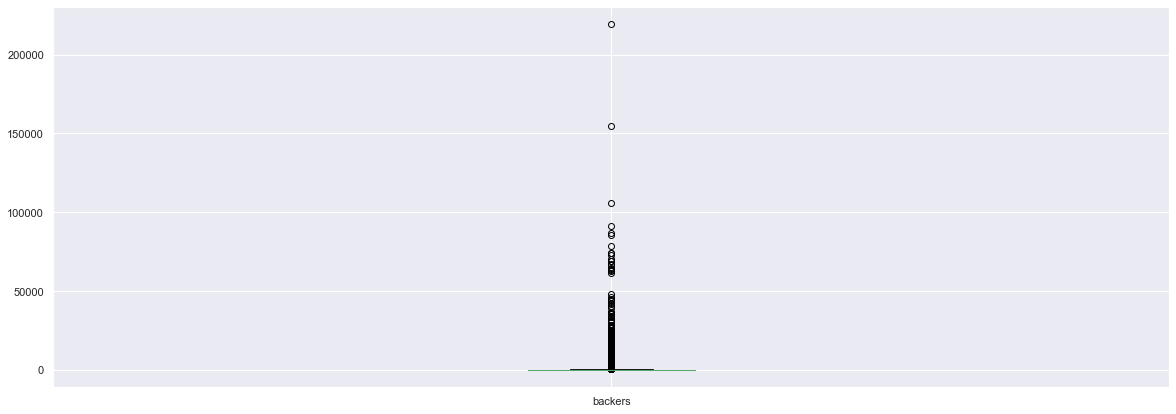

In [162]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20,7]

ks_project.query('state == "successful"')['backers'].plot.box()

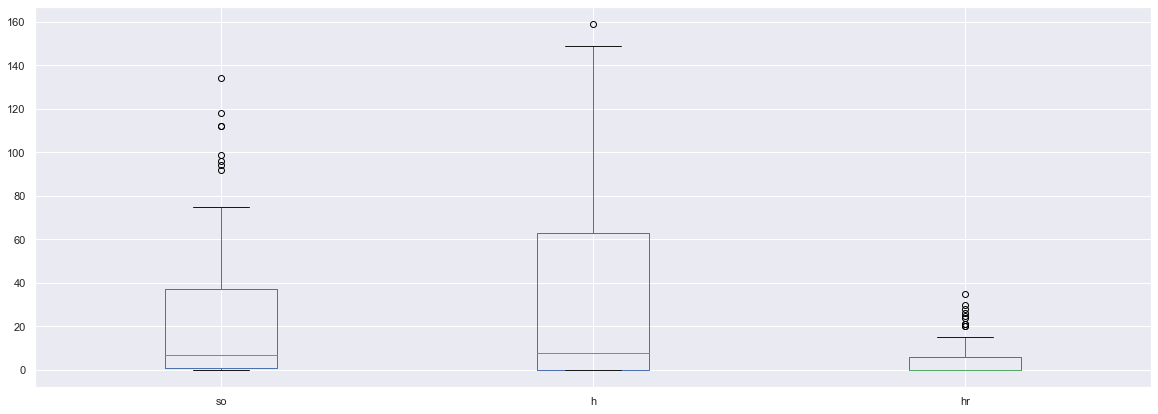

In [163]:
baseball[['so','h','hr']].plot.box()

Seaborn simplifies complex and common charts

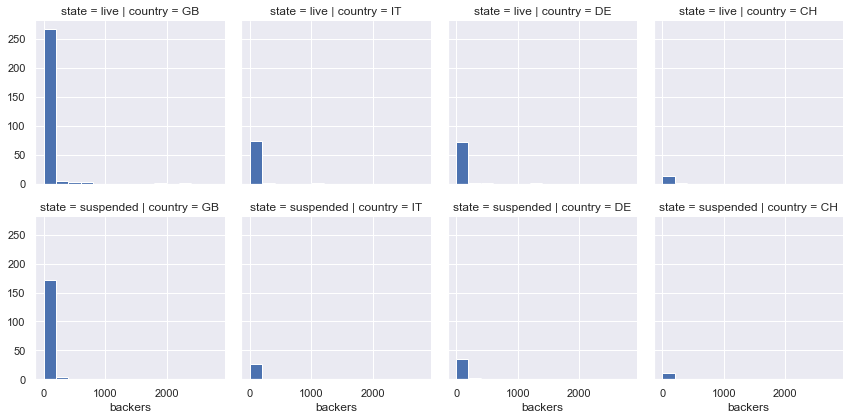

In [164]:
import seaborn as sns
some_projects = ks_project[ks_project.country.isin(['CH', 'DE', 'IT', 'GB'])].query('state == "suspended" or state == "live"')

bins = np.arange(0,3000,200)

g = sns.FacetGrid(some_projects, col="country",  row="state")
g.map(plt.hist, "backers", bins=bins);

## Exercise

- Import the kickstarter dataset
- set a sensible index on the dataset, making sure that it's unique
- compute the average of backers for the entire dataset
- find the most frequent category and main_category

Use the ?help to find out about the `value_counts`, `duplicated`, `is_unique` and `mean` methods. Also use auto-completion on series objects to find out which methods are available to complete the exercise.


In [170]:
ks_project = pd.read_csv('ks-projects-201801.csv')

## Exercise:

Select all the players with hr > average and of those the ones with so > 25%.
Find out who is the player with these performances for more than 1 year.


In [ ]:
baseball = pd.read_csv("baseball.csv")

## Exercise
Find all players that played for the Los Angeles Dodgers (LAN) or the San Francisco Giants (SFN) and how many times each player appear in the dataset


## Exercise

Find the top 10 players (players=entries, i.e., player-year-team)
with respect to hr and display their h, X2b, X3b, and hr compared to the top hr player.


In [17]:
ks_project = pd.read_csv('ks-projects-201801.csv')
ks_project.category

0                  Poetry
1          Narrative Film
2          Narrative Film
3                   Music
4            Film & Video
               ...       
378656        Documentary
378657     Narrative Film
378658     Narrative Film
378659         Technology
378660    Performance Art
Name: category, Length: 378661, dtype: object

In [18]:
ks_project_upper = ks_project.rename(columns=lambda x : x.upper())
ks_project_upper

,ID,NAME,CATEGORY,MAIN_CATEGORY,CURRENCY,DEADLINE,GOAL,LAUNCHED,PLEDGED,STATE,BACKERS,COUNTRY,USD PLEDGED,USD_PLEDGED_REAL,USD_GOAL_REAL
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [19]:
len(ks_project.dropna())

374860

## Exercise

Given the ks_project 2018 dataset, for each country show the number of project per state.
Now show the total amount of usd pledged real per project state.


In [ ]:
ks_project = pd.read_csv('ks-projects-201801.csv')

## Exercise

For each team, find out how many players-year (a player who played 2 years should count as 2) they have with an hr > avg.


## Exercise

Based on the baseball dataset, create a table with, for each team, the top 3 players (or if less than 3 players in a team, all the players) in terms of hr, sorted by descending hr.


## Exercise

Based on the kickstarter dataset, create a pivot table having as indeces the main_category and the country (only selecting US, UK, CH), and as columns the "valid" states (canceled, failed, live, successful, suspended), and as values the sum of usd pledged.
